In [1]:
#Import Dependancies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
#Import the datetime module from the datetime library
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import linregress
from scipy.stats import linregress
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))
lat_lngs
# Add the latitudes and longitudes to a list.
coordinates = lat_lngs

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


616

In [4]:
#Create empty list to hold the weather data
city_data = []
#print the beginning of the logging
print("Beginning Data Retrieval       ")
print("---------------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
---------------------------------
Processing Record 1 of Set 1 | tungor
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | bridlington
Processing Record 4 of Set 1 | reguengos de monsaraz
Processing Record 5 of Set 1 | krasnoselkup
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | laguna
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | ayan
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | srednekolymsk
Processing Record 15 of Set 1 | mazagao
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | tuatapere
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | mataura
Processing Record 22 of

Processing Record 37 of Set 4 | liberal
Processing Record 38 of Set 4 | los chiles
Processing Record 39 of Set 4 | los llanos de aridane
Processing Record 40 of Set 4 | talas
Processing Record 41 of Set 4 | seydi
Processing Record 42 of Set 4 | oyo
Processing Record 43 of Set 4 | ambilobe
Processing Record 44 of Set 4 | nome
Processing Record 45 of Set 4 | north chicago
Processing Record 46 of Set 4 | sampang
Processing Record 47 of Set 4 | kimberley
Processing Record 48 of Set 4 | xining
Processing Record 49 of Set 4 | ornskoldsvik
Processing Record 50 of Set 4 | zdunska wola
Processing Record 1 of Set 5 | bilibino
Processing Record 2 of Set 5 | bisceglie
Processing Record 3 of Set 5 | hobyo
Processing Record 4 of Set 5 | baiyin
Processing Record 5 of Set 5 | anchorage
Processing Record 6 of Set 5 | ormara
Processing Record 7 of Set 5 | vanimo
Processing Record 8 of Set 5 | meulaboh
Processing Record 9 of Set 5 | saldanha
Processing Record 10 of Set 5 | port hawkesbury
Processing Reco

Processing Record 27 of Set 8 | rio grande
Processing Record 28 of Set 8 | poso
Processing Record 29 of Set 8 | rungata
City not found. Skipping...
Processing Record 30 of Set 8 | saleaula
City not found. Skipping...
Processing Record 31 of Set 8 | northam
Processing Record 32 of Set 8 | torbay
Processing Record 33 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 34 of Set 8 | jiaohe
Processing Record 35 of Set 8 | yantal
Processing Record 36 of Set 8 | port hedland
Processing Record 37 of Set 8 | ukiah
Processing Record 38 of Set 8 | brooks
Processing Record 39 of Set 8 | talcahuano
Processing Record 40 of Set 8 | amapa
Processing Record 41 of Set 8 | senanga
Processing Record 42 of Set 8 | severo-kurilsk
Processing Record 43 of Set 8 | kudahuvadhoo
Processing Record 44 of Set 8 | mazamet
Processing Record 45 of Set 8 | northfield
Processing Record 46 of Set 8 | nabire
Processing Record 47 of Set 8 | ponta do sol
Processing Record 48 of Set 8 | basco
Processing Rec

Processing Record 17 of Set 12 | narsaq
Processing Record 18 of Set 12 | chicama
Processing Record 19 of Set 12 | hovd
Processing Record 20 of Set 12 | tiarei
Processing Record 21 of Set 12 | candelaria
Processing Record 22 of Set 12 | sebina
Processing Record 23 of Set 12 | guadalupe victoria
Processing Record 24 of Set 12 | bell ville
Processing Record 25 of Set 12 | nova olinda do norte
Processing Record 26 of Set 12 | tucurui
Processing Record 27 of Set 12 | umbuzeiro
Processing Record 28 of Set 12 | mumford
Processing Record 29 of Set 12 | sangar
Processing Record 30 of Set 12 | veseloyarsk
Processing Record 31 of Set 12 | rampur hat
Processing Record 32 of Set 12 | sao lourenco do sul
Processing Record 33 of Set 12 | afmadu
City not found. Skipping...
Processing Record 34 of Set 12 | macaboboni
City not found. Skipping...
Processing Record 35 of Set 12 | wagar
Processing Record 36 of Set 12 | rio gallegos
Processing Record 37 of Set 12 | kamaishi
Processing Record 38 of Set 12 | 

In [29]:
len(city_data)

570

In [30]:
#Convert the array of dictionaries to a pandas df
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed" ]
city_data_df = city_data_df[new_column_order]

#Create an output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export data to CSV
city_data_df.to_csv(output_data_file, index_label = "City ID")

In [31]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tungor,RU,2021-10-07 00:47:11,53.3808,142.9564,44.33,57,53,17.16
1,Bengkulu,ID,2021-10-07 00:45:55,-3.8004,102.2655,73.85,94,100,3.83
2,Bridlington,GB,2021-10-07 00:47:12,54.0831,-0.1919,53.89,79,100,13.87
3,Reguengos De Monsaraz,PT,2021-10-07 00:47:12,38.4253,-7.5349,65.88,57,0,7.14
4,Krasnoselkup,RU,2021-10-07 00:47:12,65.7000,82.4667,41.07,95,100,17.47


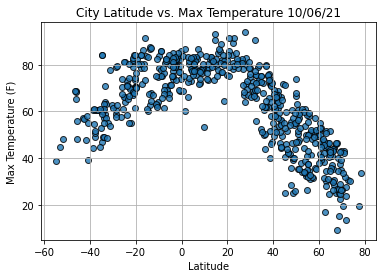

In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

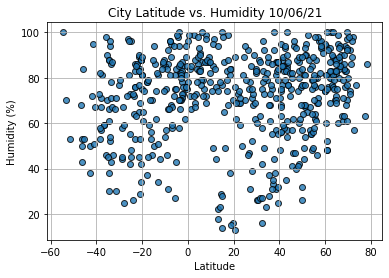

In [7]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

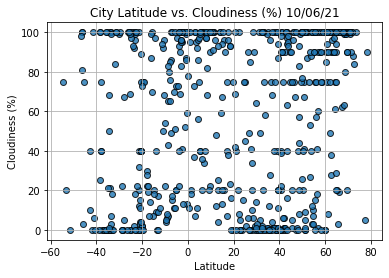

In [8]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

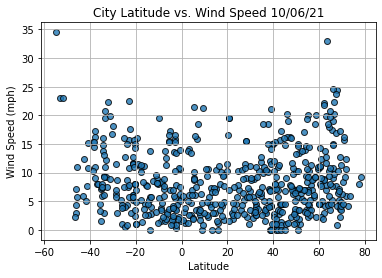

In [9]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [10]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

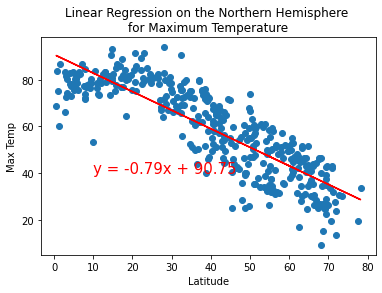

In [11]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))

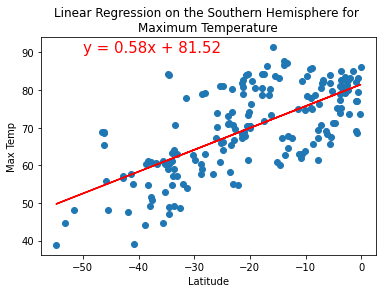

In [12]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for \nMaximum Temperature', 'Max Temp',(-50,90))

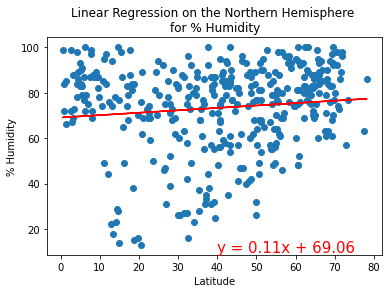

In [13]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

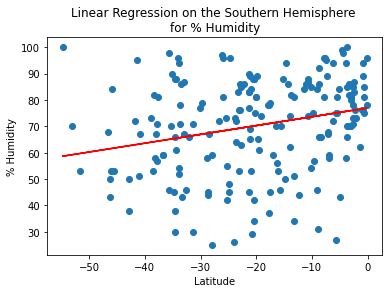

In [14]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

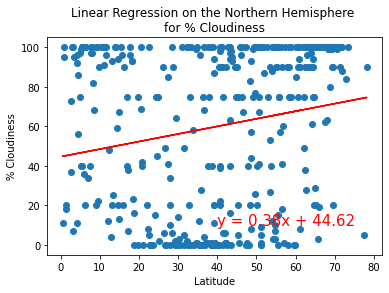

In [15]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

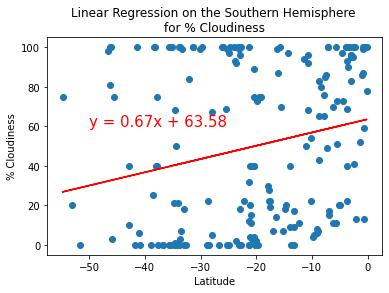

0.05025527100016074


In [16]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))


#This finds the r value
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

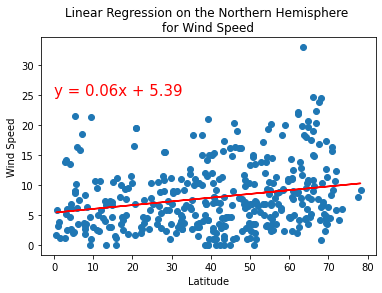

0.05125289119232077


In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(0,25))

#This finds the r value
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

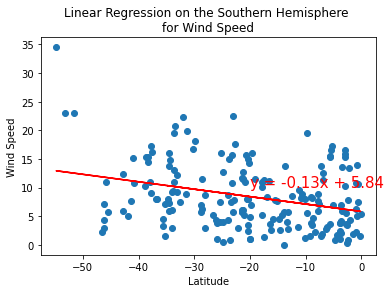

0.09662525897952595


In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-20,10))
#This finds the r value
correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Laguna,US,2021-10-07 00:47:13,38.4210,-121.4238,76.21,31,1,5.01
7,Hithadhoo,MV,2021-10-07 00:44:58,-0.6000,73.0833,83.30,75,59,10.71
13,Mazagao,BR,2021-10-07 00:47:14,-0.1150,-51.2894,86.05,78,100,5.44
26,Fukue,JP,2021-10-07 00:47:17,32.6881,128.8419,75.56,83,20,4.61
31,Barabai,ID,2021-10-07 00:47:18,-2.5833,115.3833,81.36,78,100,0.40
35,Kousseri,CM,2021-10-07 00:47:18,12.0769,15.0306,78.76,44,12,5.75
37,Sorong,ID,2021-10-07 00:47:19,-0.8833,131.2500,82.26,76,99,6.24
41,Touros,BR,2021-10-07 00:47:20,-5.1989,-35.4608,79.70,84,20,17.20
44,Vaini,TO,2021-10-07 00:44:53,-21.2000,-175.2000,80.76,89,40,12.66
45,Flinders,AU,2021-10-07 00:45:43,-34.5833,150.8552,84.06,38,0,7.40


City          171
Country       171
Date          171
Lat           171
Lng           171
Max Temp      171
Humidity      171
Cloudiness    171
Wind Speed    171
dtype: int64

,City,Country,Max Temp,Lat,Lng,Hotel Name
5,Laguna,US,76.21,38.4210,-121.4238,
7,Hithadhoo,MV,83.30,-0.6000,73.0833,
13,Mazagao,BR,86.05,-0.1150,-51.2894,
26,Fukue,JP,75.56,32.6881,128.8419,
31,Barabai,ID,81.36,-2.5833,115.3833,
35,Kousseri,CM,78.76,12.0769,15.0306,
37,Sorong,ID,82.26,-0.8833,131.2500,
41,Touros,BR,79.70,-5.1989,-35.4608,
44,Vaini,TO,80.76,-21.2000,-175.2000,
45,Flinders,AU,84.06,-34.5833,150.8552,


NameError: name 'g_key' is not defined

In [ ]:
halfway through 6.5.4